In [ ]:
%tensorflow_version 2.x #this line should only be used on google colab

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #this line should only be used on google colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 529M/543M [00:06<00:00, 83.6MB/s]
100% 543M/543M [00:06<00:00, 92.9MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 83.9MB/s]
 90% 244M/271M [00:03<00:00, 58.7MB/s]
100% 271M/271M [00:04<00:00, 70.5MB/s]


In [ ]:
!unzip -q train.zip
!unzip -q test1.zip

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [ ]:
# *********************************
# | - train_data
#   | - cat
#   | - dog
# *********************************
master_folder = "train_data"
os.mkdir(master_folder)
unique_class = ["cat", "dog"]
[os.mkdir(os.path.join(".", master_folder, i)) for i in unique_class]

[None, None]

In [ ]:
# *********************************
# | - test_data
#   | - cat
#   | - dog
# *********************************
master_folder1 = "test_data"
os.mkdir(master_folder1)
unique_class = ["cat", "dog"]
[os.mkdir(os.path.join(".", master_folder1, i)) for i in unique_class]

[None, None]

In [ ]:
import shutil, tqdm
for image in tqdm.tqdm_notebook(os.listdir("train")):
  if "cat" in image:
    shutil.copy(os.path.join("train", image), os.path.join(master_folder, "cat"))
  else:
    shutil.copy(os.path.join("train", image), os.path.join(master_folder, "dog"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
import shutil, tqdm
for image in tqdm.tqdm_notebook(os.listdir("test1")):
  if "cat" in image:
    shutil.copy(os.path.join("test1", image), os.path.join(master_folder1, "cat"))
  else:
    shutil.copy(os.path.join("test1", image), os.path.join(master_folder1, "dog"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [ ]:
#os.listdir("train_data/cat")

In [ ]:
#os.listdir("test_data/dog")

In [ ]:
# | - data_folder
#   | - category_1
#   | - category_2
#   | - category_3

In [ ]:
!rm -rf train
!rm -rf test1
!rm -rf sampleSubmission.csv
!rm -rf test1.zip
!rm -rf train.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
train_generater = idg.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="training")
val_generater = idg.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="validation")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(rescale=1/255.0)
test_generater = idg.flow_from_directory("test_data", target_size=(150,150), batch_size=32)

Found 12500 images belonging to 2 classes.


In [ ]:
# data with augumentation
idg_aug = ImageDataGenerator(rescale=1/255.0, horizontal_flip=True, zoom_range=0.2, brightness_range=(0.2, 0.4), validation_split=0.2)
train_generater_aug = idg_aug.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="training")
val_generater_aug = idg_aug.flow_from_directory("train_data", target_size=(150,150), batch_size=32, subset="validation")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
from tensorflow.keras import callbacks

Output feature shape = (Image Shape  - Filter shape) / (Strides)  + 1

In [ ]:
# (I=150 - F=3) / (S = 1) + 1 = 148

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1),activation=relu, input_shape=(150,150,3)))   #148*148*32 Output of 1st Conv
model.add(MaxPooling2D(pool_size=(2,2)))                                               #74*74*32
model.add(Conv2D(64, (3,3), strides=(1,1),activation=relu))                            #72*72*64
model.add(MaxPooling2D(pool_size=(2,2)))                                               #36*36*64
model.add(Flatten())                                                                   #82,944
model.add(Dense(512, activation=relu))
model.add(Dense(2, activation=softmax))

In [ ]:
# 32(num of filters) * (3*3*3)(size of filter) + 32(bias) [16, 32, 64, 128, 512]
print(32*3*3*3  + 32)
print(64*3*3*32 + 64)

896
18496


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               42467840  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1

In [ ]:
model.compile(SGD(), categorical_crossentropy, ["acc"])
model_history = model.fit(train_generater_aug, epochs=25, validation_data=val_generater_aug)

Epoch 1/25
625/625 [==============================] - 204s 327ms/step - loss: 0.6806 - acc: 0.5601 - val_loss: 0.6623 - val_acc: 0.6214
Epoch 2/25
625/625 [==============================] - 204s 327ms/step - loss: 0.6606 - acc: 0.6073 - val_loss: 0.6519 - val_acc: 0.6194
Epoch 3/25
625/625 [==============================] - 205s 328ms/step - loss: 0.6460 - acc: 0.6266 - val_loss: 0.6311 - val_acc: 0.6530
Epoch 4/25
625/625 [==============================] - 204s 326ms/step - loss: 0.6257 - acc: 0.6491 - val_loss: 0.6062 - val_acc: 0.6628
Epoch 5/25
625/625 [==============================] - 202s 323ms/step - loss: 0.6058 - acc: 0.6711 - val_loss: 0.5890 - val_acc: 0.6956
Epoch 6/25
625/625 [==============================] - 201s 321ms/step - loss: 0.5821 - acc: 0.6960 - val_loss: 0.5791 - val_acc: 0.6898
Epoch 7/25
625/625 [==============================] - 201s 322ms/step - loss: 0.5636 - acc: 0.7126 - val_loss: 0.5494 - val_acc: 0.7314
Epoch 8/25
625/625 [============================

### If you have less training data you should do Data Augumentation 

In [ ]:
monitor = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto')

model.compile(SGD(), categorical_crossentropy, ["acc"])
model_history = model.fit(train_generater, epochs=25, callbacks=[monitor], validation_data=val_generater)

Epoch 1/25
625/625 [==============================] - 77s 123ms/step - loss: 0.6628 - acc: 0.5957 - val_loss: 0.6322 - val_acc: 0.6298
Epoch 2/25
625/625 [==============================] - 75s 119ms/step - loss: 0.6016 - acc: 0.6732 - val_loss: 0.5632 - val_acc: 0.7206
Epoch 3/25
625/625 [==============================] - 76s 121ms/step - loss: 0.5483 - acc: 0.7199 - val_loss: 0.5322 - val_acc: 0.7294
Epoch 4/25
625/625 [==============================] - 77s 123ms/step - loss: 0.5055 - acc: 0.7522 - val_loss: 0.5114 - val_acc: 0.7464
Epoch 5/25
625/625 [==============================] - 75s 120ms/step - loss: 0.4747 - acc: 0.7739 - val_loss: 0.5366 - val_acc: 0.7296
Epoch 6/25
625/625 [==============================] - 75s 120ms/step - loss: 0.4422 - acc: 0.7945 - val_loss: 0.5036 - val_acc: 0.7550
Epoch 7/25
625/625 [==============================] - 75s 120ms/step - loss: 0.4072 - acc: 0.8191 - val_loss: 0.4738 - val_acc: 0.7672
Epoch 8/25
625/625 [==============================] - 7

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

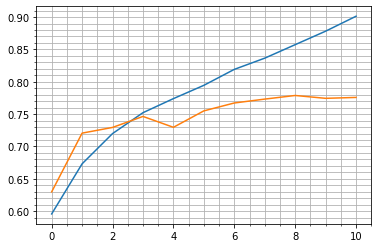

In [ ]:
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])
plt.minorticks_on()
plt.grid(True, which="both")

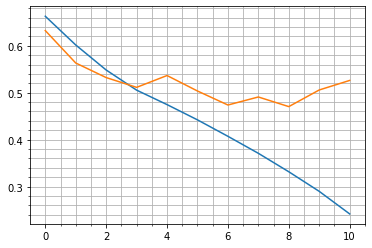

In [ ]:
plt.plot(model_history.history["loss"], label="Loss")
plt.plot(model_history.history["val_loss"], label="Val loss")
plt.minorticks_on()
plt.grid(True, which="both")